In [3]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

from sklearn.model_selection import KFold
from lightgbm import LGBMClassifier

import gc
import myutil

#ref: https://www.kaggle.com/ogrellier/good-fun-with-ligthgbm/code#L294

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
class lgbWrapper():
    def __init__(self, seed=0, params=None):
        return
    
    def init_model(self):
        self.clf = LGBMClassifier(
            n_estimators=4000,
            learning_rate=0.03,
            num_leaves=30,
            colsample_bytree=.8,
            subsample=.9,
            max_depth=7,
            reg_alpha=.1,
            reg_lambda=.1,
            min_split_gain=.01,
            min_child_weight=2,
            silent=-1,
            verbose=-1,
        )
        return    
    def __str__(self):
        print('lgb')

    def train(self, trn_x, trn_y):
        self.clf.fit(trn_x, trn_y, verbose=100)

    def predict(self, x):
        result = self.clf.predict_proba(x, num_iteration=self.clf.best_iteration_)[:, 1]
        return result
    
    def get_coef(self):
        return self.clf.feature_importances_

lgb = lgbWrapper()

In [23]:
data, test, y = myutil.get_train_test_label()


train datasset shape: (307511, 828)
test datasset shape: (48744, 828)


In [24]:
oof_preds, test_preds, importances, folds = myutil.cross_validation(data, test, y, lgb)

Fold  1 AUC : 0.785396
Fold  2 AUC : 0.782126
Fold  3 AUC : 0.783657
Fold  4 AUC : 0.784734
Fold  5 AUC : 0.780090
Full AUC score 0.783181


lightgbm


ValueError: Found input variables with inconsistent numbers of samples: [50000, 307511]

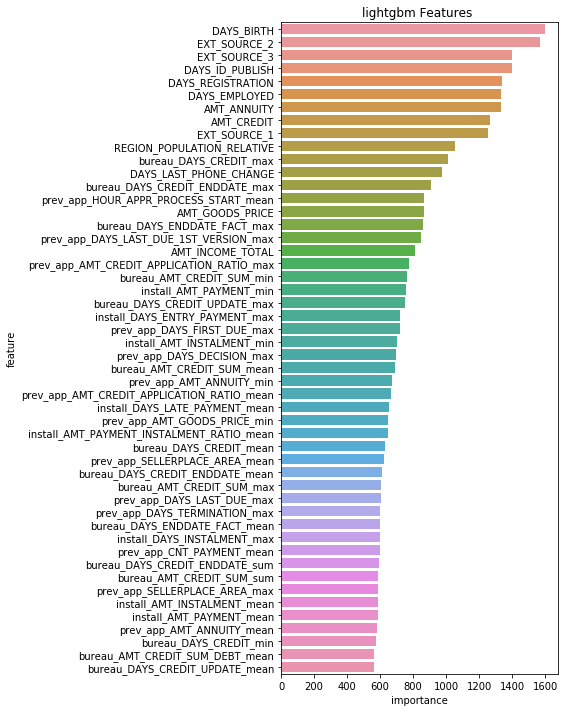

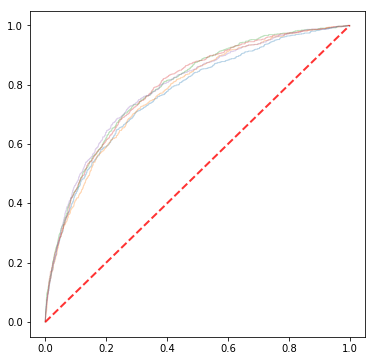

In [51]:
title = 'lightgbm'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)

In [12]:
oof_preds, test_preds, importances, folds = myutil.cross_validation_undersample(data, test, y, lgb)

total n fold : 11
Fold  1 AUC : 0.521720
Fold  2 AUC : 0.490358
Fold  3 AUC : 0.519462
Fold  4 AUC : 0.514722
Fold  5 AUC : 0.390013


KeyboardInterrupt: 

lightgbm_undersample
Index(['EXT_SOURCE_2', 'DAYS_BIRTH', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'AMT_ANNUITY', 'DAYS_EMPLOYED', 'EXT_SOURCE_1',
       'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'bureau_DAYS_CREDIT_max',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_INCOME_TOTAL',
       'bureau_DAYS_CREDIT_ENDDATE_max',
       'prev_app_HOUR_APPR_PROCESS_START_mean', 'bureau_DAYS_ENDDATE_FACT_max',
       'prev_app_DAYS_LAST_DUE_1ST_VERSION_max', 'AMT_GOODS_PRICE',
       'install_AMT_PAYMENT_min', 'bureau_AMT_CREDIT_SUM_min',
       'prev_app_AMT_CREDIT_APPLICATION_RATIO_max',
       'install_AMT_INSTALMENT_min', 'bureau_DAYS_CREDIT_UPDATE_max',
       'prev_app_AMT_ANNUITY_min', 'prev_app_DAYS_FIRST_DUE_max',
       'prev_app_DAYS_DECISION_max',
       'prev_app_AMT_CREDIT_APPLICATION_RATIO_mean', 'bureau_DAYS_CREDIT_mean',
       'bureau_AMT_CREDIT_SUM_mean', 'prev_app_SELLERPLACE_AREA_mean',
       'install_DAYS_LATE_PAYMENT_mean', 'prev_app_DAYS_LAST_DUE_max',
  

/home/khlau/Documents/msbd5012/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


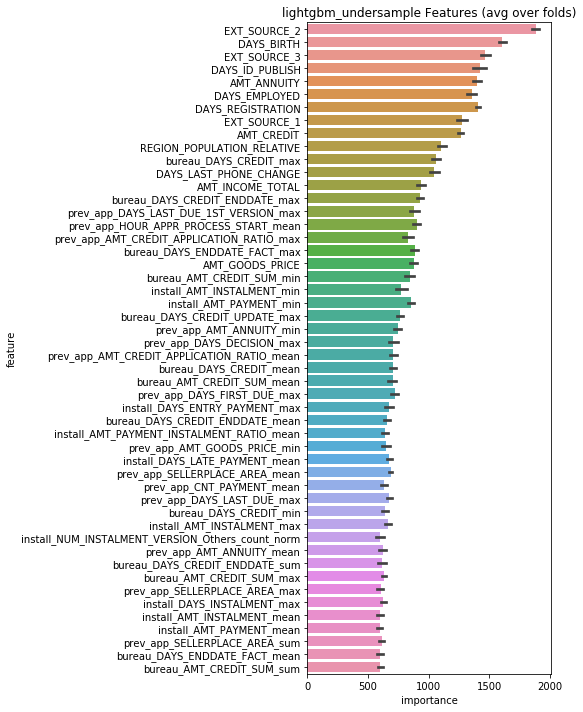

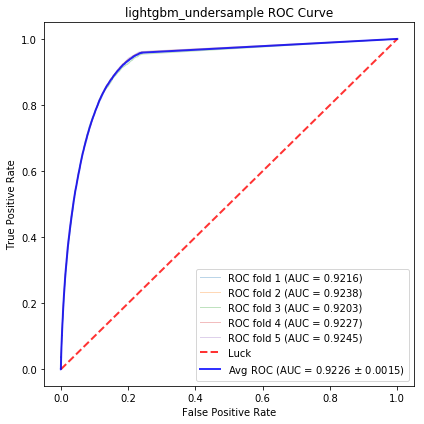

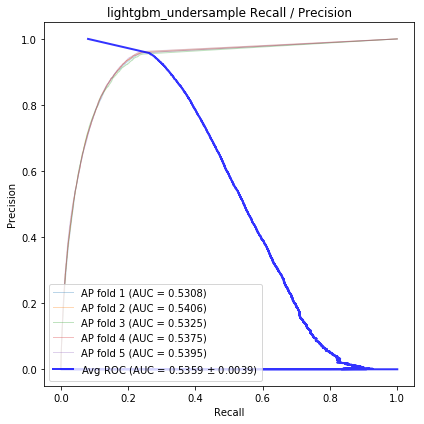

In [7]:
title = 'lightgbm_undersample'
myutil.report(test_preds, folds, importances, data, y, oof_preds, title)

In [25]:
myutil.feature_select_cross_validation_undersample(importances, data, test, y, lgb)

number of iteration: 16
0
total n fold : 11
Fold  1 AUC : 0.500565
Fold  2 AUC : 0.500985
Fold  3 AUC : 0.502744
Fold  4 AUC : 0.500888
Fold  5 AUC : 0.499680
Fold  6 AUC : 0.502862
Fold  7 AUC : 0.506033
Fold  8 AUC : 0.494661
Fold  9 AUC : 0.503827
Fold 10 AUC : 0.506907
Fold 11 AUC : 0.501615
Full AUC score 0.834024
1
total n fold : 11
Fold  1 AUC : 0.499214
Fold  2 AUC : 0.498154
Fold  3 AUC : 0.498143
Fold  4 AUC : 0.501149
Fold  5 AUC : 0.494492
Fold  6 AUC : 0.501244
Fold  7 AUC : 0.496715
Fold  8 AUC : 0.501235
Fold  9 AUC : 0.504529
Fold 10 AUC : 0.497212
Fold 11 AUC : 0.499721
Full AUC score 0.918364
2
total n fold : 11
Fold  1 AUC : 0.500729
Fold  2 AUC : 0.496323
Fold  3 AUC : 0.498563
Fold  4 AUC : 0.498950
Fold  5 AUC : 0.497038
Fold  6 AUC : 0.502769
Fold  7 AUC : 0.502914
Fold  8 AUC : 0.501223
Fold  9 AUC : 0.490714
Fold 10 AUC : 0.499100
Fold 11 AUC : 0.505664
Full AUC score 0.919858
3
total n fold : 11
Fold  1 AUC : 0.501625
Fold  2 AUC : 0.500810
Fold  3 AUC : 0.498

In [31]:
cols_all = importances[["feature", "importance"]].groupby("feature").mean().sort_values(
            by="importance", ascending=False)[:500].index
print(cols_all)
cols_all_df = pd.DataFrame(cols_all, columns = ['feature'])
cols_all_df.to_csv('lgbm_selectFeature.csv', index=False)

Index(['DAYS_BIRTH', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_ID_PUBLISH',
       'DAYS_REGISTRATION', 'DAYS_EMPLOYED', 'AMT_ANNUITY', 'AMT_CREDIT',
       'EXT_SOURCE_1', 'REGION_POPULATION_RELATIVE',
       ...
       'NAME_TYPE_SUITE_Unaccompanied', 'credit_bal_AMT_DRAWINGS_CURRENT_min',
       'NAME_TYPE_SUITE_Family',
       'prev_app_NAME_GOODS_CATEGORY_Direct Sales_count_norm',
       'prev_app_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_count_norm',
       'prev_app_PRODUCT_COMBINATION_Cash Street: middle_count',
       'prev_app_CODE_REJECT_REASON_XNA_count_norm', 'ORGANIZATION_TYPE_Other',
       'prev_app_PRODUCT_COMBINATION_POS industry with interest_count',
       'prev_app_PRODUCT_COMBINATION_Cash X-Sell: low_count'],
      dtype='object', name='feature', length=500)


In [36]:
fs_df = pd.read_csv('lgbm_selectFeature.csv')
print(fs_df)
features = fs_df['feature'].values.tolist()
print(features)

                                               feature
0                                           DAYS_BIRTH
1                                         EXT_SOURCE_2
2                                         EXT_SOURCE_3
3                                      DAYS_ID_PUBLISH
4                                    DAYS_REGISTRATION
5                                        DAYS_EMPLOYED
6                                          AMT_ANNUITY
7                                           AMT_CREDIT
8                                         EXT_SOURCE_1
9                           REGION_POPULATION_RELATIVE
10                              bureau_DAYS_CREDIT_max
11                              DAYS_LAST_PHONE_CHANGE
12                      bureau_DAYS_CREDIT_ENDDATE_max
13               prev_app_HOUR_APPR_PROCESS_START_mean
14                                     AMT_GOODS_PRICE
15                        bureau_DAYS_ENDDATE_FACT_max
16              prev_app_DAYS_LAST_DUE_1ST_VERSION_max
17        

In [54]:
data, test, y = myutil.get_train_test_label(500) 


train datasset shape: (500, 828)
test datasset shape: (500, 828)


In [60]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
best_param = myutil.opt(features, data)

Initialization
------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 Step |   Time |      Value |   bagging_fraction |   feature_fraction |   lambda_l1 |   lambda_l2 |   max_depth |   min_child_weight |   min_split_gain |   num_leaves | 
us_df.shape:  (68, 828)
    1 | 00m00s |    0.50000 |             0.9583 |             0.6167 |      4.8931 |      1.9198 |      5.3476 |            32.7936 |           0.0272 |      35.5251 | 
us_df.shape:  (68, 828)
    2 | 00m00s |    0.50000 |             0.9058 |             0.4501 |      3.9958 |      0.4301 |      5.0807 |            32.5443 |           0.0776 |      39.0190 | 
us_df.shape:  (68, 828)
    3 | 00m00s |    0.50000 |             0.9136 |             0.8134 |      2.3074 |      2.8340 |      8.3222 |            32.7620 |           0.0462 |      36.6580 | 
us_df.shape:  (68, 828)
    4 | 00m00s |    0.50000 |           

KeyboardInterrupt: 